In [11]:
import pandas as pd
import numpy as np
from collections import Counter

from pathlib import Path
from sklearn import tree

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [12]:
full_df = pd.read_csv("full_data.csv")

In [13]:
full_df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,MONTH_BAL_AVG,STATUS
0,5008804,0,427500.0,2,3,3,1,-12005,-4542,1,...,0,2.0,0,1,0,1,0,1,0.066667,1
1,5008805,0,427500.0,2,3,3,1,-12005,-4542,1,...,0,2.0,0,1,0,1,0,1,0.071429,1
2,5008806,0,112500.0,2,1,4,2,-21474,-1134,1,...,2,2.0,0,1,0,1,0,1,0.000000,0
3,5008808,0,270000.0,4,1,0,2,-19110,-3051,1,...,3,1.0,1,0,1,0,0,1,0.000000,0
4,5008810,0,270000.0,4,1,0,2,-19110,-3051,1,...,3,1.0,1,0,1,0,0,1,0.000000,0


In [14]:
# Define features set
X = full_df.copy()
X = full_df.drop(columns="STATUS")
X

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,MONTH_BAL_AVG
0,5008804,0,427500.0,2,3,3,1,-12005,-4542,1,...,0,0,2.0,0,1,0,1,0,1,0.066667
1,5008805,0,427500.0,2,3,3,1,-12005,-4542,1,...,0,0,2.0,0,1,0,1,0,1,0.071429
2,5008806,0,112500.0,2,1,4,2,-21474,-1134,1,...,0,2,2.0,0,1,0,1,0,1,0.000000
3,5008808,0,270000.0,4,1,0,2,-19110,-3051,1,...,1,3,1.0,1,0,1,0,0,1,0.000000
4,5008810,0,270000.0,4,1,0,2,-19110,-3051,1,...,1,3,1.0,1,0,1,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33105,5149828,0,315000.0,2,1,4,2,-17348,-2420,1,...,0,5,2.0,0,1,0,1,0,1,1.000000
33106,5149834,0,157500.0,4,3,4,2,-12387,-1325,1,...,1,6,2.0,1,0,1,0,0,1,0.750000
33107,5149838,0,157500.0,1,3,4,2,-12387,-1325,1,...,1,6,2.0,1,0,1,0,0,1,0.545455
33108,5150049,0,283500.0,2,1,4,2,-17958,-655,1,...,0,3,2.0,1,0,1,0,0,1,0.200000


In [15]:
# Define target vector
# y = full_df["STATUS"].values.reshape(-1, 1)
y = full_df["STATUS"].values
y[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [16]:
print(f"Labels (y)\n{y}\n-----------------")
print(f"Features (X)\n{X}")

Labels (y)
[1 1 0 ... 1 1 1]
-----------------
Features (X)
            ID  CNT_CHILDREN  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  \
0      5008804             0          427500.0                 2   
1      5008805             0          427500.0                 2   
2      5008806             0          112500.0                 2   
3      5008808             0          270000.0                 4   
4      5008810             0          270000.0                 4   
...        ...           ...               ...               ...   
33105  5149828             0          315000.0                 2   
33106  5149834             0          157500.0                 4   
33107  5149838             0          157500.0                 1   
33108  5150049             0          283500.0                 2   
33109  5150337             0          112500.0                 2   

       NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  \
0                        3                

## Data Balance

## Checking for imbalance

In [17]:
# Checking for Balance
counter = Counter(y)
print(counter)
print(f"Heavily imbalanced: {round((np.sum(y) / len(y)) * 100, 2)}%")

Counter({0: 28819, 1: 4291})
Heavily imbalanced: 12.96%


Text(0.5, 0.98, 'Imbalance Observation')

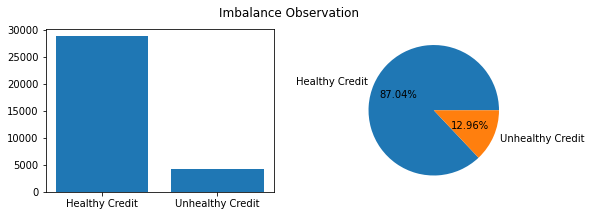

In [18]:
# Fixing the imbalance
# summarize class distribution
# data = counter
data = {'Healthy Credit': list(counter.values())[1], 'Unhealthy Credit': list(counter.values())[0]}
names = list(data.keys()) 
values = list(data.values())

labels = names
sizes = values

fig, axs = plt.subplots(1,2, figsize=(9, 3))
axs[0].bar(names, values)
axs[1].pie(sizes, labels=names, autopct='%1.2f%%')
fig.suptitle('Imbalance Observation')

In [19]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


AttributeError: 'NoneType' object has no attribute 'split'

In [20]:
# summarize the new class distribution
counter_resampled = Counter(y)
print(counter_resampled)

Counter({0: 28819, 1: 4291})


Text(0.5, 0.98, 'After Resampling Observation')

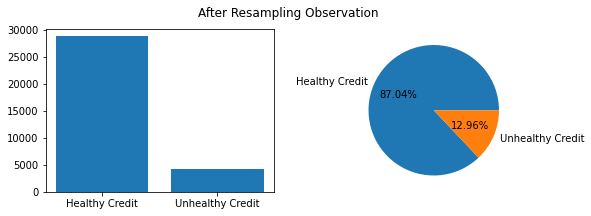

In [21]:
data_resampled = {'Healthy Credit': list(counter_resampled.values())[1], 'Unhealthy Credit': list(counter_resampled.values())[0]}
names_resampled = list(data_resampled.keys()) 
values_resampled = list(data_resampled.values())

labels = names
sizes = values_resampled

fig, axs = plt.subplots(1,2, figsize=(9, 3))
axs[0].bar(names_resampled, values_resampled)
axs[1].pie(sizes, labels=names_resampled, autopct='%1.2f%%')
fig.suptitle('After Resampling Observation')

In [22]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
 # Creating StandardScaler instance
scaler = StandardScaler()

In [24]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [25]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

In [26]:
 # Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [27]:
 # Fitting the model
model = model.fit(X_train_scaled, y_train)

In [28]:
 # Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

In [29]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [30]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,7244,0
Actual 1,0,1034


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7244
           1       1.00      1.00      1.00      1034

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278



In [31]:
# Create DOT data
##dot_data = tree.export_graphviz(
#    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
##)

# Draw graph
##graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
##Image(graph.create_png())

In [44]:
# Saving the tree as PDF
file_path = ("Output/credit_tree.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = ("Output/credit_tree.png")
graph.write_png(file_path)

NameError: name 'graph' is not defined

## Tuning decision tree

In [45]:
# Prunning the decision tree by Adjusting maximum depth parameter
# Parameter by name min_sample_leaf (minimum number of samples to be a leaf Node).
# Max_features = The number of features to be looking for the best split If “auto”, then max_features=sqrt(n_features).
# If “sqrt”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).
# If None, then max_features=n_features

#reference https://github.com/tanujsawant/Hyper-Parameter-Optimization-of-Decision-Tree-/blob/master/TANUJ_ASSIGNMENT3.ipynb

In [46]:
from scipy.stats import randint #importing the random int function

In [47]:
from  sklearn.model_selection import RandomizedSearchCV #Using radomized search for hyperparmeter search

In [48]:
param_dist = {"max_depth": [5, None],
              "max_features": randint(1, 5),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [49]:
Decision_Tree_tunning = RandomizedSearchCV(model,param_dist,cv=5) 
#Cv is cross validation generator
#param_dist is choosing distinct parameters

In [50]:
Decision_Tree_tunning.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CEA4424730>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CEA44334C0>})

In [51]:
y_pred = Decision_Tree_tunning.predict(X_test) #predicting on testing data

In [52]:
cm2 = confusion_matrix(y_test, predictions)
cm2_df = pd.DataFrame(
    cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

In [53]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,7244,0
Actual 1,0,1034


Accuracy Score : 0.9939598936941291
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7244
           1       0.99      0.96      0.98      1034

    accuracy                           0.99      8278
   macro avg       0.99      0.98      0.99      8278
weighted avg       0.99      0.99      0.99      8278



In [54]:
accuracy_score(y_test,y_pred)  #Checking the accuracy of our model

0.9939598936941291

In [55]:
print("Tuned Decision Tree Parameters: {}".format(Decision_Tree_tunning.best_params_))
#Printing out the parameters of the current search

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 5}
